**Задание Lite**

Проведите серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии.

1. Поменять количество нейронов в скрытом сверточном слое и обучить сеть, использовав следующие значения:

 -первая сеть - скрытый слой 2 нейрона

 -вторая сеть - тот же скрытый слой 4 нейрона

 -третья сеть - тот же скрытый слой 16 нейронов

2. Поменяйте активационную функцию в скрытых слоях с relu на linear

3. Поменяйте размеры batch_size: 10 , 100, Вся база (50000)

4. Запишите в таблицу получившиеся точности.

5. Напишите выводы по результатам проведенных тестов.

In [ ]:
# Для начала импортируем все необходимые для создания нейронной сети библиотеки.

from tensorflow.keras.models import Sequential 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import random
import math
import os
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

# Домашние задание будет выполняться на примерах работы с Cifar10

# Поготовка данных 

In [ ]:
# Для начала загрузим базу cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
# Разделим обучающую выборку на (обучающую и проверочную). Чтобы не задействовать тестовую во время обучения
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)
# Посмотрим на размр выборок
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(40000, 1)
(10000, 1)
(10000, 1)


In [ ]:
# Преобразуем ответы y_train, y_val и y_test в ohe
y_train = utils.to_categorical (y_train,10)
y_val = utils.to_categorical (y_val,10)
y_test = utils.to_categorical (y_test,10)

# Посмотрим на размерность получившихся массивов 
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
df = pd.DataFrame(columns = ['neurons', 'batch_size', ' activation', 'learn_loss', 'learn_accuracy', 'val_loss', 'val_accuracy', 'test_loss', 'test_accuracy'])

# Создание нейронной сети

**Для начала посмотрим на результат нейронной сети из урока. Результат занесем в таблицу.**

In [ ]:
#задаём batch_size
batch_size = 128 


model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar10 и сохраняем результат в переменной history
history = model.fit(x_train, y_train,  batch_size=batch_size, epochs=20, validation_data=(x_val, y_val), verbose=0)

# Делаем проверку на тестовой выборке
scores = model.evaluate(x_test, y_test, verbose=0)

# Создаем пустой словарь. 
dct = []  
# В цикле проходимся по всем значениям из history                                                  
for v in history.history.values():                                        
  dct.append (v)                                            # Результат выгружаются в словарь.                                                                
result = np.array(dct)                                      # Переводим в numpy массив.


# Формируем строчку в DataFrame.
# В строке будет: Кол-во нейронов в Dense слое, размер batch_size, loss и accuracy во всех трех выборках 

df.loc[0] = [512, 128, 'relu', result[0][-1], result[1][-1]*100, result[2][-1], result[3][-1]*100, scores[0], scores[1]*100]



# Задание 1 - 3.
1. Поменять количество нейронов в скрытом сверточном слое и обучить сеть, использовав следующие значения:
  - Скрытый слой **2** нейрона
  - Скрытый слой **4** нейрона
  - Скрытый слой **16** нейрона
2. Активационная функция **relu** и **linear**
3. Размеры batch_size:
 - **10**
 - **100**
 - (**40000**)Вся база  -  Выводит ошибку(переполнение памяти, поэтому будет **10000**)

 **Итого 18 вариантов**

 Выходные значения всех вариантов будут представлены в таблице ниже

Так как всего будет 18 вариантов нейронных сетей, то чтобы не создавать 18 моделей, иначе будет очень длинный код для проверки, будем делать через цикл. Для этого :  
 - для начала создадим списки, где будут перебираться такие значения:
    - Количество нейронов в полносвязном слое Dense (2, 4, 16)
    - Размер batch_size
    - verbose= 0 (Так же чтобы не был длинный код для проверки, потому что важны только значения из последней эпохи, они и будут занесены в таблицу.

In [ ]:
# Создадим списки, чтобы проходиться по ним циклами
neurons = [2, 4, 16 ]
batch_size = [10, 100, 10000]
activ = ['relu', 'linear']

# Счетчик для таблицы в pd (номер строки)
count = 1 

In [ ]:
#Создаем последовательную модель

for n in neurons:                                  # n - пройдемся по списку нейронов
  for b in batch_size:                             # b - по списку размеров batch_size
    for a in activ:                                # a - по списку активационных функций 
      model = Sequential()

      model.add(BatchNormalization(input_shape=(32, 32, 3)))
      model.add(Conv2D(32, (3, 3), padding='same', activation=a))
      model.add(Conv2D(32, (3, 3), padding='same', activation=a))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))


      model.add(BatchNormalization())
      model.add(Conv2D(64, (3, 3), padding='same', activation=a))
      model.add(Conv2D(64, (3, 3), padding='same', activation=a))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))


      model.add(BatchNormalization())
      model.add(Conv2D(128, (3, 3), padding='same', activation=a))
      model.add(Conv2D(128, (3, 3), padding='same', activation=a))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))


      model.add(Flatten())
      model.add(Dense(n, activation=a))
      model.add(Dropout(0.25))
      model.add(Dense(10, activation='softmax'))

      #Компилируем сеть
      model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
      
      # Обучаем сеть с сохранением результатов
      history = model.fit(x_train, y_train, batch_size=b, epochs=20, validation_data=(x_val, y_val), verbose=0)

      # Посмотрим значения на тестовой выбоке
      scores = model.evaluate(x_test, y_test, verbose=1)
 
      # Аналогично как и до этого, только будет еще увеличиваться счетчик count 
      dct = []
      for v in history.history.values():                                        
        dct.append (v)
      result = np.array(dct)
      df.loc[count] = [n, b, a, result[0][-1], result[1][-1]*100, result[2][-1], result[3][-1]*100, scores[0], scores[1]*100]    
      count += 1

313/313 [==============================] - 1s 3ms/step - loss: 1.4804 - accuracy: 0.4800


# Задание 4. Запишите в таблицу получившиеся точности

In [ ]:
df

,neurons,batch_size,activation,learn_loss,learn_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,512,128,relu,0.365445,87.064999,0.576602,81.489998,0.571318,81.580001
1,2,10,relu,2.302848,9.925000,2.302953,9.340000,2.302693,10.000000
2,2,10,linear,1.608688,33.274999,1.407691,42.510000,1.412017,42.210001
3,2,100,relu,2.302687,9.972500,2.302804,9.340000,2.302612,10.000000
4,2,100,linear,1.536127,36.620000,1.332310,47.400001,1.324437,46.840000
5,2,10000,relu,2.302561,10.165000,2.302794,9.340000,2.302608,10.000000
6,2,10000,linear,2.010650,23.377500,2.039800,23.240000,2.048289,22.720000
7,4,10,relu,2.302936,9.892500,2.302800,9.340000,2.302670,10.000000
8,4,10,linear,1.261676,50.857502,0.989946,65.499997,0.998291,65.509999
9,4,100,relu,2.302681,9.962500,2.302899,9.340000,2.302632,10.000000


**Можно составить топ-3 результатов (лучших и худших). Чтобы было проще ориентироваться.**

In [ ]:
print('3 лучших результата по минимальной ошибке тестовой выборки')
df.sort_values('test_loss').head(3)

3 лучших результата по минимальной ошибке тестовой выборки


,neurons,batch_size,activation,learn_loss,learn_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,512,128,relu,0.365445,87.064999,0.576602,81.489998,0.571318,81.580001
16,16,100,linear,0.743584,74.510002,0.751435,75.220001,0.744341,74.610001
14,16,10,linear,0.886546,69.667500,0.802549,73.019999,0.799554,72.920001


In [ ]:
print('3 лучших результата по максимальной точности тестовой выборки')
df.sort_values('test_accuracy', ascending=False).head(3)

3 лучших результата по максимальной точности тестовой выборки


,neurons,batch_size,activation,learn_loss,learn_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,512,128,relu,0.365445,87.064999,0.576602,81.489998,0.571318,81.580001
16,16,100,linear,0.743584,74.510002,0.751435,75.220001,0.744341,74.610001
14,16,10,linear,0.886546,69.667500,0.802549,73.019999,0.799554,72.920001


In [ ]:
print('3 худших! результата по минимальной максимальной ошибке тестовой выборки')
df.sort_values('test_loss', ascending=False).head(3)

3 худших! результата по минимальной ошибке тестовой выборки


,neurons,batch_size,activation,learn_loss,learn_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
17,16,10000,relu,1.855438,30.627501,2.463285,9.90,2.451772,10.02
13,16,10,relu,2.302776,10.025000,2.303093,9.78,2.302850,10.00
1,2,10,relu,2.302848,9.925000,2.302953,9.34,2.302693,10.00


In [ ]:
print('3 худших! результата по максимальной точности тестовой выборки')
df.sort_values('test_accuracy').head(3)

3 худших! результата по максимальной точности тестовой выборки


,neurons,batch_size,activation,learn_loss,learn_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
9,4,100,relu,2.302681,9.9625,2.302899,9.34,2.302632,10.0
1,2,10,relu,2.302848,9.9250,2.302953,9.34,2.302693,10.0
3,2,100,relu,2.302687,9.9725,2.302804,9.34,2.302612,10.0


# Определение изображений из тестовой выборки

В задании не было, но можно попробовать как нейронная сеть справится с распознованием картинки из тестовой выборки.

In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test)

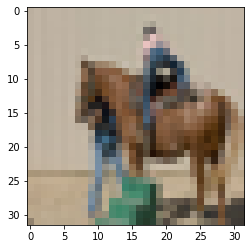

Распознанный браз на картинке:  лошадь


In [ ]:
#Выбираем номер пример
n = np.random.randint(x_test.shape[0])

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Распознанный браз на картинке: ", classes[np.argmax(prediction[n])])

# Задание 5. Выводы

  Изменения гиперпараметров приводит к изменениям результата обучения нейронной сети, такие параметры как:
*   Архитектура 
*   Количество нейронов
*   Активационные функции
*   Размер batch_size
*   Выбор оптимизатора, функции ошибок и другие.

  В данной работе видно, что:
  - Чем меньше нейронов в полносвязном слое Dense тем хуже обучилась сеть.
  - Значение batch_size так же влияет на результат. Маленькое значение (1-10), а так же большое (10000 и выше) значительно ухудшает параметры сети. Нужна "золотая" середина.

 - Лучше всех показала себя сеть из лекции с максимальным кол-вом нейронов 512. Не смотря на то, что у нее была активационная функция **relu.**

 - В вариантах перебора из задания активационная функция **linear** показала лучший результат чем **relu** на тех же параметрах.

 - batch_size раным 100 показал лучше значения, чем 10 и 10000. Размер batch_size при обучении также очень важен.

 - Так же нужно подбирать кол-во нейронов в разных слоях. И кол-во эпох.

 - Не мало важно использовать слои BatchNormalization для нормализации входных значений и слой Dropout чтобы избавится от переобучения. 

 - Изменение такого параметра как lr(learning rate) с последующим повторным обучением так же поможет улучшить результат.


